In [2]:
import pandas as pd
import seaborn as sns
results = pd.read_csv('results.csv', index_col=None)
for name in ['_no_block', '_cbh', '_degree', '_random']:
    results['total' + name] = sum(results[str(i)+name] for i in range(1, 4)).subtract(20) 
sns.set()
results = results[results.seed_size == 20]
results.head()

,network_name,threshold,seed_size,budget_total,0_no_block,1_no_block,2_no_block,3_no_block,0_cbh,1_cbh,...,2_degree,3_degree,0_random,1_random,2_random,3_random,total_no_block,total_cbh,total_degree,total_random
39,fb-pages-politician,2,20,29,889.0,0.0,0.0,5019.0,909.5,4.5,...,60.4,4845.2,889.0,15.1,30.5,4973.4,4999.0,4978.5,4885.6,4999.0
40,fb-pages-politician,2,20,59,889.0,0.0,0.0,5019.0,936.2,0.6,...,65.0,4772.9,889.4,36.3,72.0,4910.3,4999.0,4951.8,4817.9,4998.6
41,fb-pages-politician,2,20,118,889.0,0.0,0.0,5019.0,950.5,1.0,...,143.5,4659.1,890.7,50.7,128.2,4838.4,4999.0,4937.5,4782.6,4997.3
42,fb-pages-politician,2,20,177,889.0,0.0,0.0,5019.0,955.4,0.0,...,273.8,4552.6,891.1,41.7,199.5,4775.7,4999.0,4932.6,4806.4,4996.9
43,fb-pages-politician,2,20,236,889.0,0.0,0.0,5019.0,2029.4,1.2,...,239.6,4457.2,896.8,105.9,260.7,4644.6,4999.0,3858.6,4676.8,4991.2


In [3]:
for i in range(results.shape[0]):
    if results.iloc[i,0] == "astroph":
        results.iloc[i, 3] /= 18771
        for j in range(results.shape[1] - 4, results.shape[1]):
            results.iloc[i,j] /= 18771
    elif results.iloc[i,0] == "fb-pages-politician":
        results.iloc[i, 3] /= 5908
        for j in range(results.shape[1] - 4, results.shape[1]):
            results.iloc[i,j] /= 5908
    elif results.iloc[i,0] == "wiki":
        results.iloc[i, 3] /= 7066
        for j in range(results.shape[1] - 4, results.shape[1]):
            results.iloc[i,j] /= 7066
    

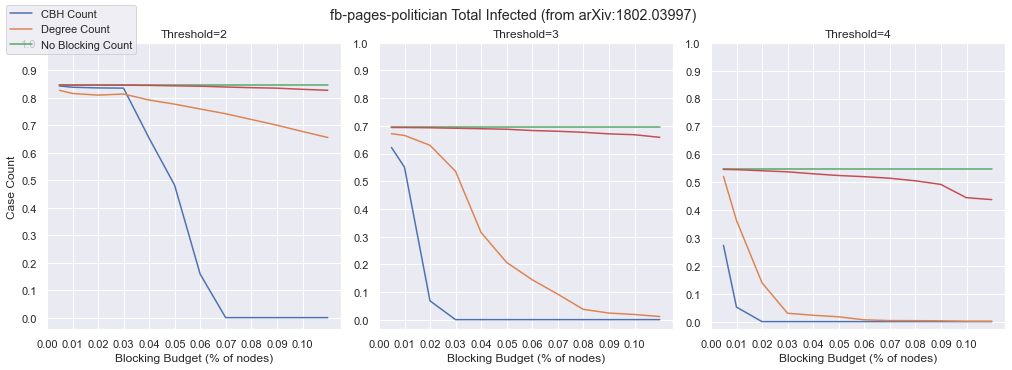

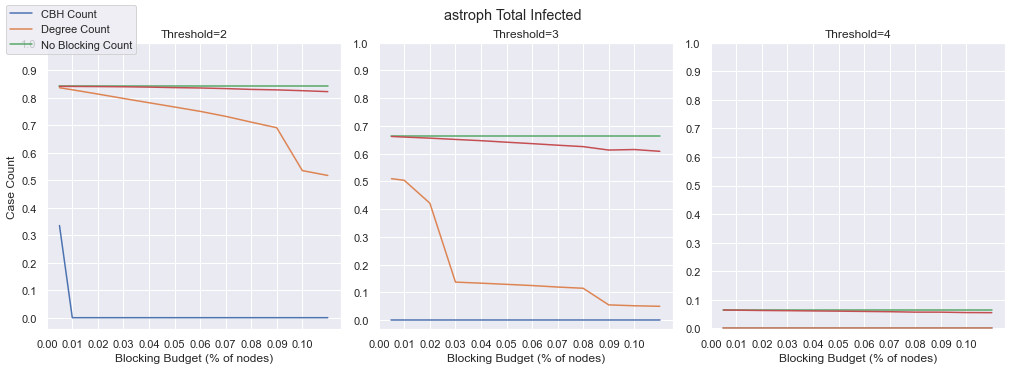

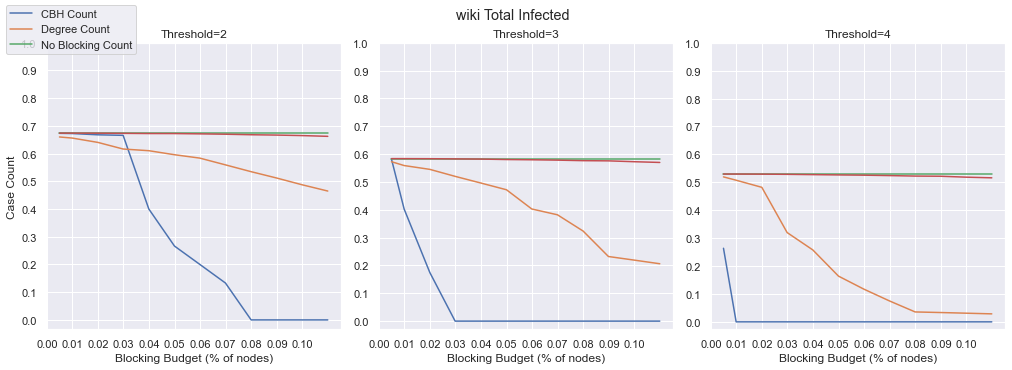

In [4]:
import matplotlib.pyplot as plt
import numpy as np
names = ['fb-pages-politician','astroph', 'wiki']
thres = [2, 3, 4]

for name in names:
    threshold = results[results.network_name == name]
    fig, ax = plt.subplots(1,3, figsize=(14, 5))
    fig.suptitle(name + " Total Infected")
    if name == 'fb-pages-politician':
        fig.suptitle(name + " Total Infected (from arXiv:1802.03997)")
#        threshold = threshold[threshold.seed_size == 10]
    for i in range(len(thres)):
        subdf = threshold[threshold.threshold == thres[i]]
        cbh, = ax[i].plot(list(subdf.budget_total)[:-1], list(subdf.total_cbh)[:-1])
        degree, = ax[i].plot(list(subdf.budget_total)[:-1], list(subdf.total_degree)[:-1])
        no_block, = ax[i].plot(list(subdf.budget_total)[:-1], list(subdf.total_no_block)[:-1])
        random, = ax[i].plot(list(subdf.budget_total)[:-1], list(subdf.total_random)[:-1])
        ax[i].set_xticks(np.arange(0, .11, .01))
        ax[i].set_yticks(np.arange(0, 1.1, .1))
    fig.tight_layout(pad=1)
    fig.legend([cbh, degree, no_block], ['CBH Count', "Degree Count", "No Blocking Count"], loc='upper left')
    for i in range(3):
        ax[i].set_xlabel("Blocking Budget (% of nodes)")
        ax[i].set_title("Threshold=" + str(thres[i]))
    ax[0].set_ylabel("Case Count")
    plt.savefig("infected_cnt_" + name + ".pdf", bbox_inches="tight")

In [4]:
astroph = results[(results.network_name == "astroph")]

astro_sub_df = astroph[['total_no_block', 'threshold', 'total_degree', 'total_cbh']]
astro_sub_df

,total_no_block,threshold,total_degree,total_cbh
117,0.841298,2,0.585510,0.586575
118,0.841298,2,0.083032,0.083139
119,0.841298,2,0.000000,0.000000
120,0.841298,2,0.000000,0.000000
121,0.841298,2,0.000000,0.000000
122,0.841298,2,0.000000,0.000000
123,0.841298,2,0.000000,0.000000
124,0.841298,2,0.000000,0.000000
125,0.841298,2,0.000000,0.000000
126,0.841298,2,0.000000,0.000000
